In [1]:
# standard library imports
import os
import sys
# third part imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# flow those tensors 
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# custom script imports
sys.path.append(os.path.join('..', 'src'))
from utils import make_samples, plot_rnn_output
# make it pretty
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('../data/prep_daily_temp_ts.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 4 columns):
date                     3650 non-null object
temp                     3650 non-null float64
detrended_temp           3650 non-null float64
detrended_scaled_temp    3650 non-null float64
dtypes: float64(3), object(1)
memory usage: 114.2+ KB


In [4]:
df.head()

,date,temp,detrended_temp,detrended_scaled_temp
0,1981-01-01,20.7,9.608113,0.788005
1,1981-01-02,17.9,6.808066,0.681639
2,1981-01-03,18.8,7.708018,0.715825
3,1981-01-04,14.6,3.507971,0.556277
4,1981-01-05,15.8,4.707924,0.601860


In [5]:
split_index = int(df.shape[0] * 0.6)
train_mask = df.index < split_index
test_mask = np.invert(train_mask)

In [6]:
train_data_in, train_data_out = make_samples(df.loc[train_mask, 'detrended_scaled_temp'], 365, 365)
test_data_in, test_data_out = make_samples(df.loc[test_mask, 'detrended_scaled_temp'], 365, 365)

In [7]:
train_data_in = train_data_in.reshape(train_data_in.shape[0], train_data_in.shape[1], 1)
test_data_in = test_data_in.reshape(test_data_in.shape[0], test_data_in.shape[1], 1)

In [8]:
adam = Adam(learning_rate=0.01)

model = Sequential()
model.add(LSTM(
    5, 
    activation='sigmoid', 
    input_shape=(train_data_in.shape[1], train_data_in.shape[2])))
model.add(Dense(train_data_out.shape[1]))
model.compile(optimizer=adam, loss='mse')

In [9]:
history = model.fit(
    train_data_in, 
    train_data_out, 
    epochs=250, 
    batch_size=256, 
    verbose=0, 
    validation_data=(test_data_in, test_data_out), 
    shuffle=True
)

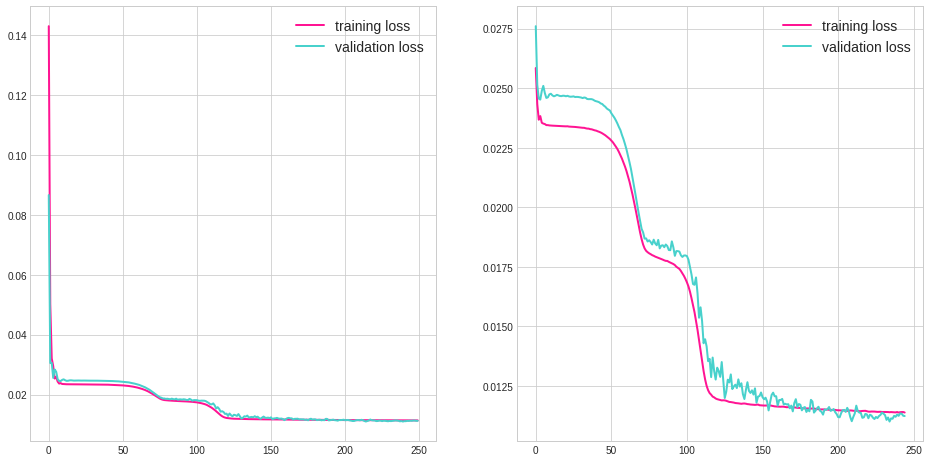

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].plot(history.history['loss'], color='deeppink', linewidth=2, label='training loss')
axs[0].plot(history.history['val_loss'], color='mediumturquoise', linewidth=2, label='validation loss')
axs[0].legend(fontsize=14)
axs[1].plot(history.history['loss'][5:], color='deeppink', linewidth=2, label='training loss')
axs[1].plot(history.history['val_loss'][5:], color='mediumturquoise', linewidth=2, label='validation loss')
axs[1].legend(fontsize=14);

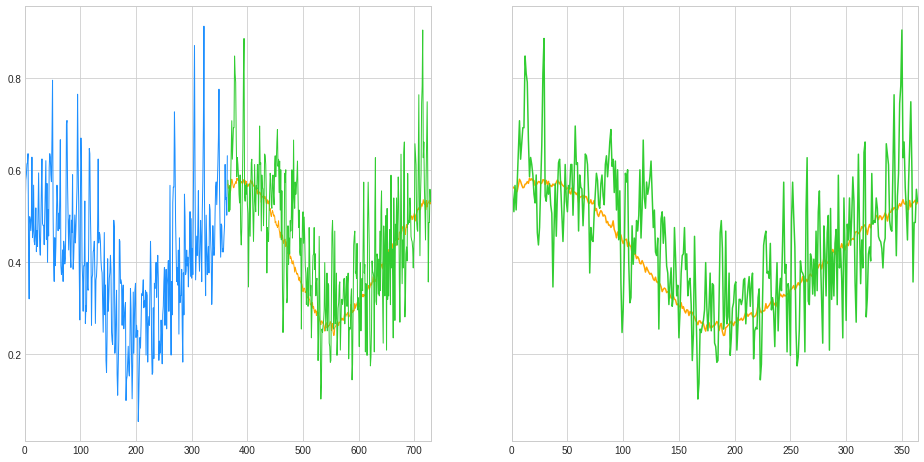

In [11]:
plot_rnn_output(test_data_in, test_data_out, 0, model)

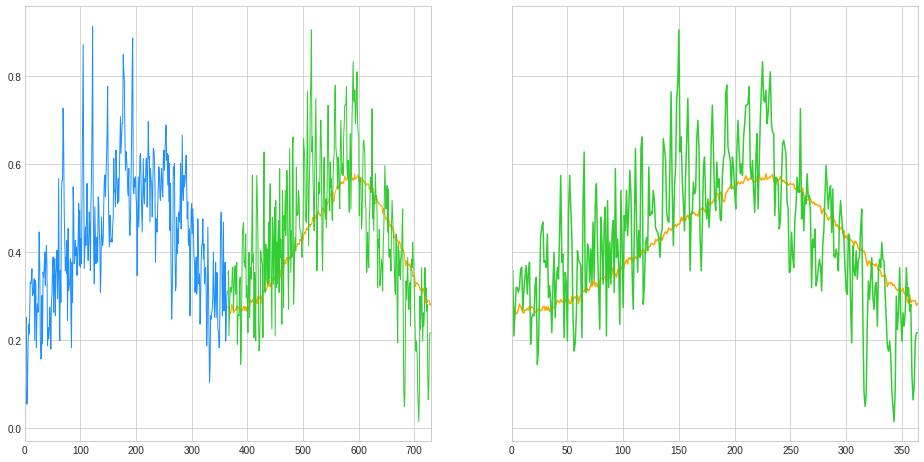

In [12]:
plot_rnn_output(test_data_in, test_data_out, 200, model)

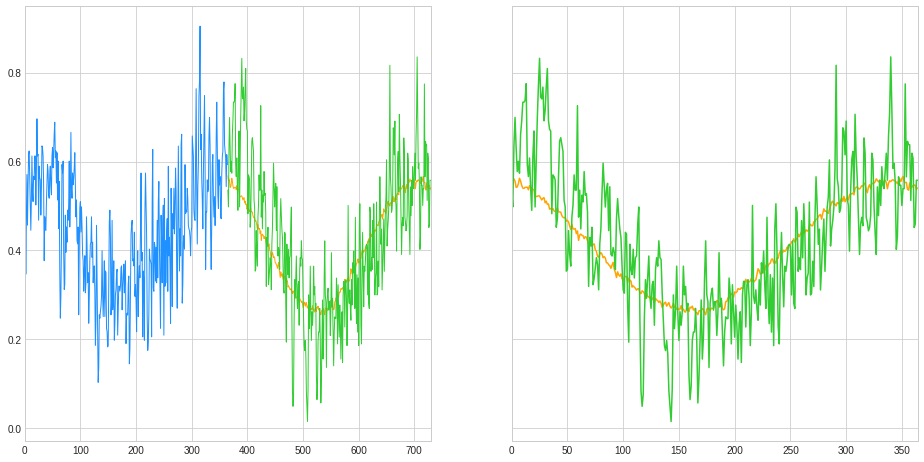

In [13]:
plot_rnn_output(test_data_in, test_data_out, 400, model)

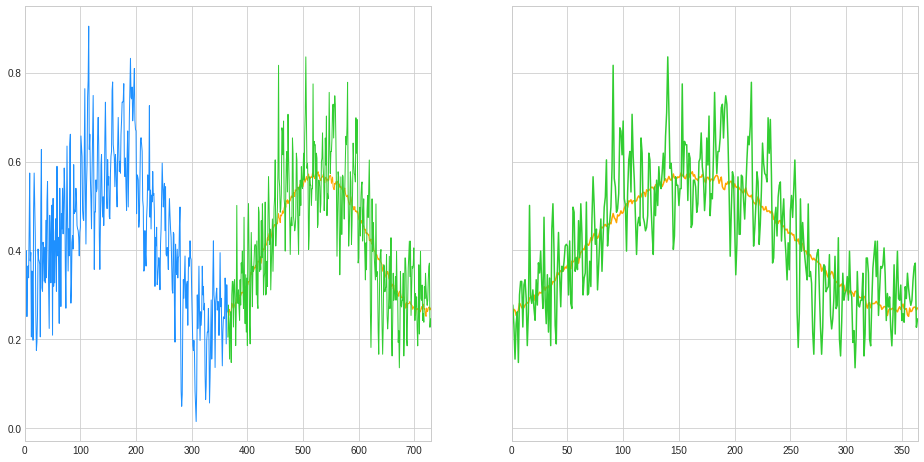

In [14]:
plot_rnn_output(test_data_in, test_data_out, 600, model)